## Import Essentials

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df= pd.read_csv('diamonds.csv')

## Data Overview

In [15]:
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

### Dropping `Unnamed: 0` column because we don`t need it

In [16]:
df.drop('Unnamed: 0',axis=1, inplace=True)

## EDA

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [18]:
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

### Missing Values

In [19]:
print("Total Missing Values: ",df.isna().sum().sum())
print("Missing Values By Column: \n",df.isna().sum())

Total Missing Values:  0
Missing Values By Column: 
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


### Duplicates

In [20]:
df.duplicated().sum()

146

In [21]:
# Drop Duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Outliers

In [22]:
outliers = pd.DataFrame()

for col in df.select_dtypes(include=['number']).columns:
    # quartiles and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # outliers by column
    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not col_outliers.empty:
        outliers = pd.concat([outliers, col_outliers])

# Show the outliers found
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8632 entries, 12246 to 51506
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    8632 non-null   float64
 1   cut      8632 non-null   object 
 2   color    8632 non-null   object 
 3   clarity  8632 non-null   object 
 4   depth    8632 non-null   float64
 5   table    8632 non-null   float64
 6   price    8632 non-null   int64  
 7   x        8632 non-null   float64
 8   y        8632 non-null   float64
 9   z        8632 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 741.8+ KB


## Visualization

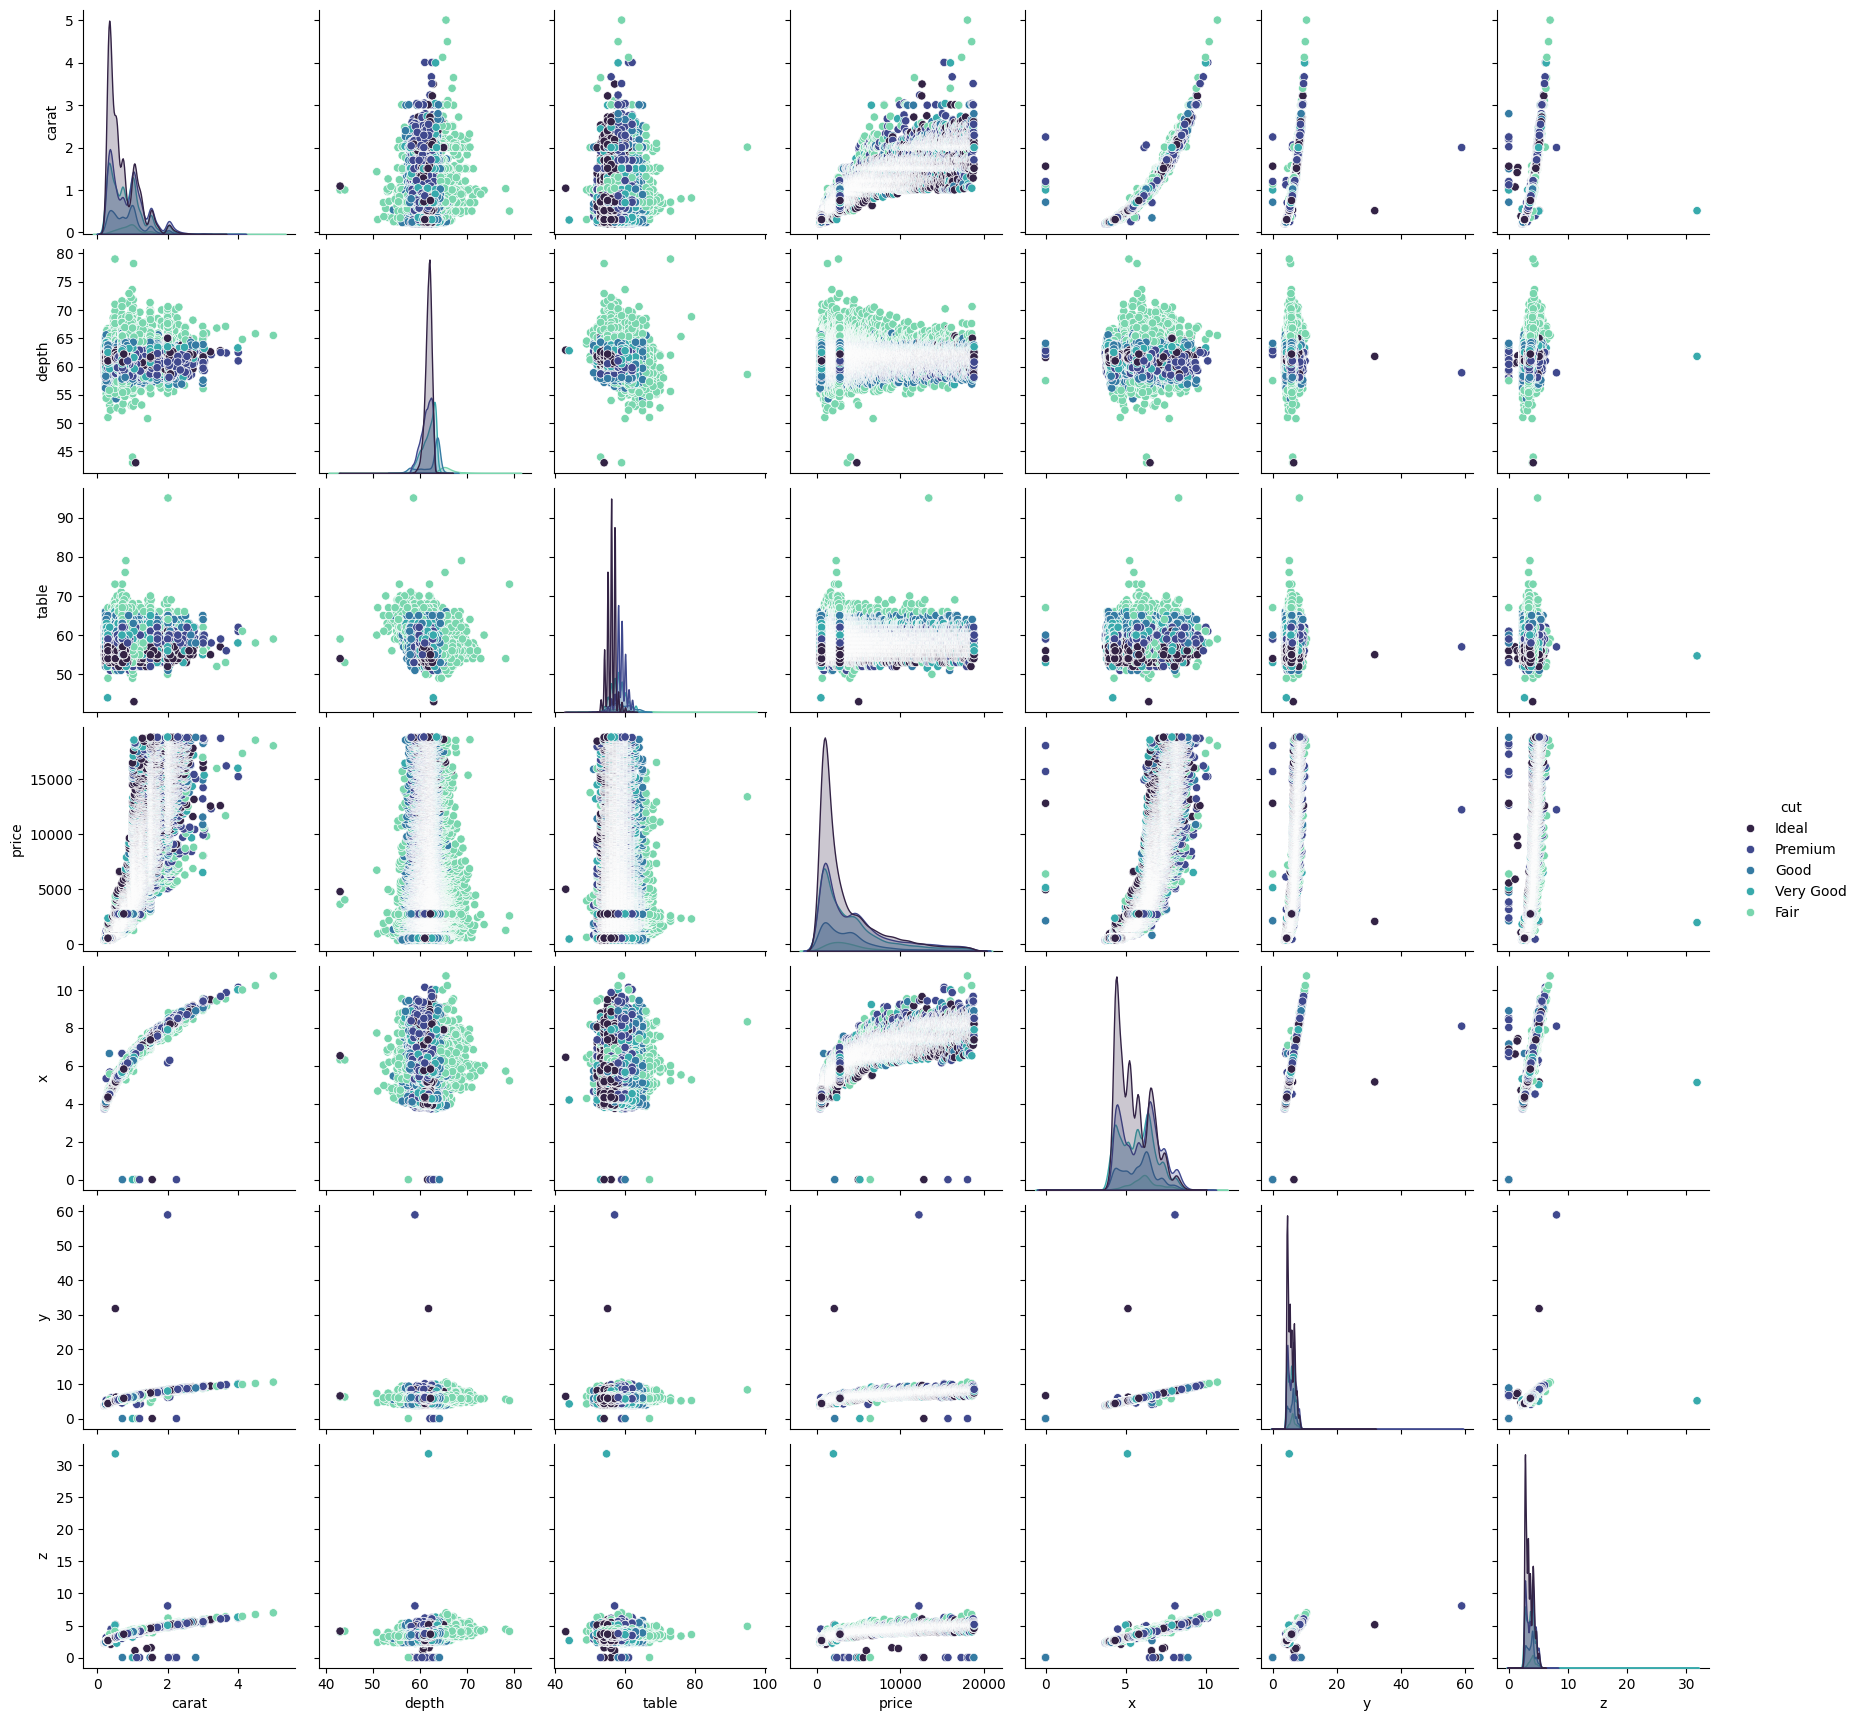

In [23]:
#pair plot
sns.pairplot(df, hue='cut',palette="mako")
plt.show()

In [24]:
# Dropping outliers
df_cleaned = df.drop(outliers.index)

df_cleaned = df_cleaned.reset_index(drop=True)

df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47416 entries, 0 to 47415
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    47416 non-null  float64
 1   cut      47416 non-null  object 
 2   color    47416 non-null  object 
 3   clarity  47416 non-null  object 
 4   depth    47416 non-null  float64
 5   table    47416 non-null  float64
 6   price    47416 non-null  int64  
 7   x        47416 non-null  float64
 8   y        47416 non-null  float64
 9   z        47416 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


In [25]:
df_cleaned.describe()

carat         depth         table         price             x  \
count  47416.000000  47416.000000  47416.000000  47416.000000  47416.000000   
mean       0.708950     61.785908     57.261517   3112.258984      5.547416   
std        0.371023      1.106205      2.021723   2751.212081      0.979717   
min        0.200000     58.800000     52.000000    326.000000      3.730000   
25%        0.380000     61.100000     56.000000    891.000000      4.640000   
50%        0.600000     61.900000     57.000000   2064.000000      5.440000   
75%        1.010000     62.500000     59.000000   4637.000000      6.410000   
max        2.000000     64.700000     63.500000  11888.000000      8.280000   

                  y             z  
count  47416.000000  47416.000000  
mean       5.552283      3.428830  
std        0.973817      0.606057  
min        3.680000      1.410000  
25%        4.650000      2.860000  
50%        5.460000      3.360000  
75%        6.410000      3.980000  
max        8.270000      5.300000

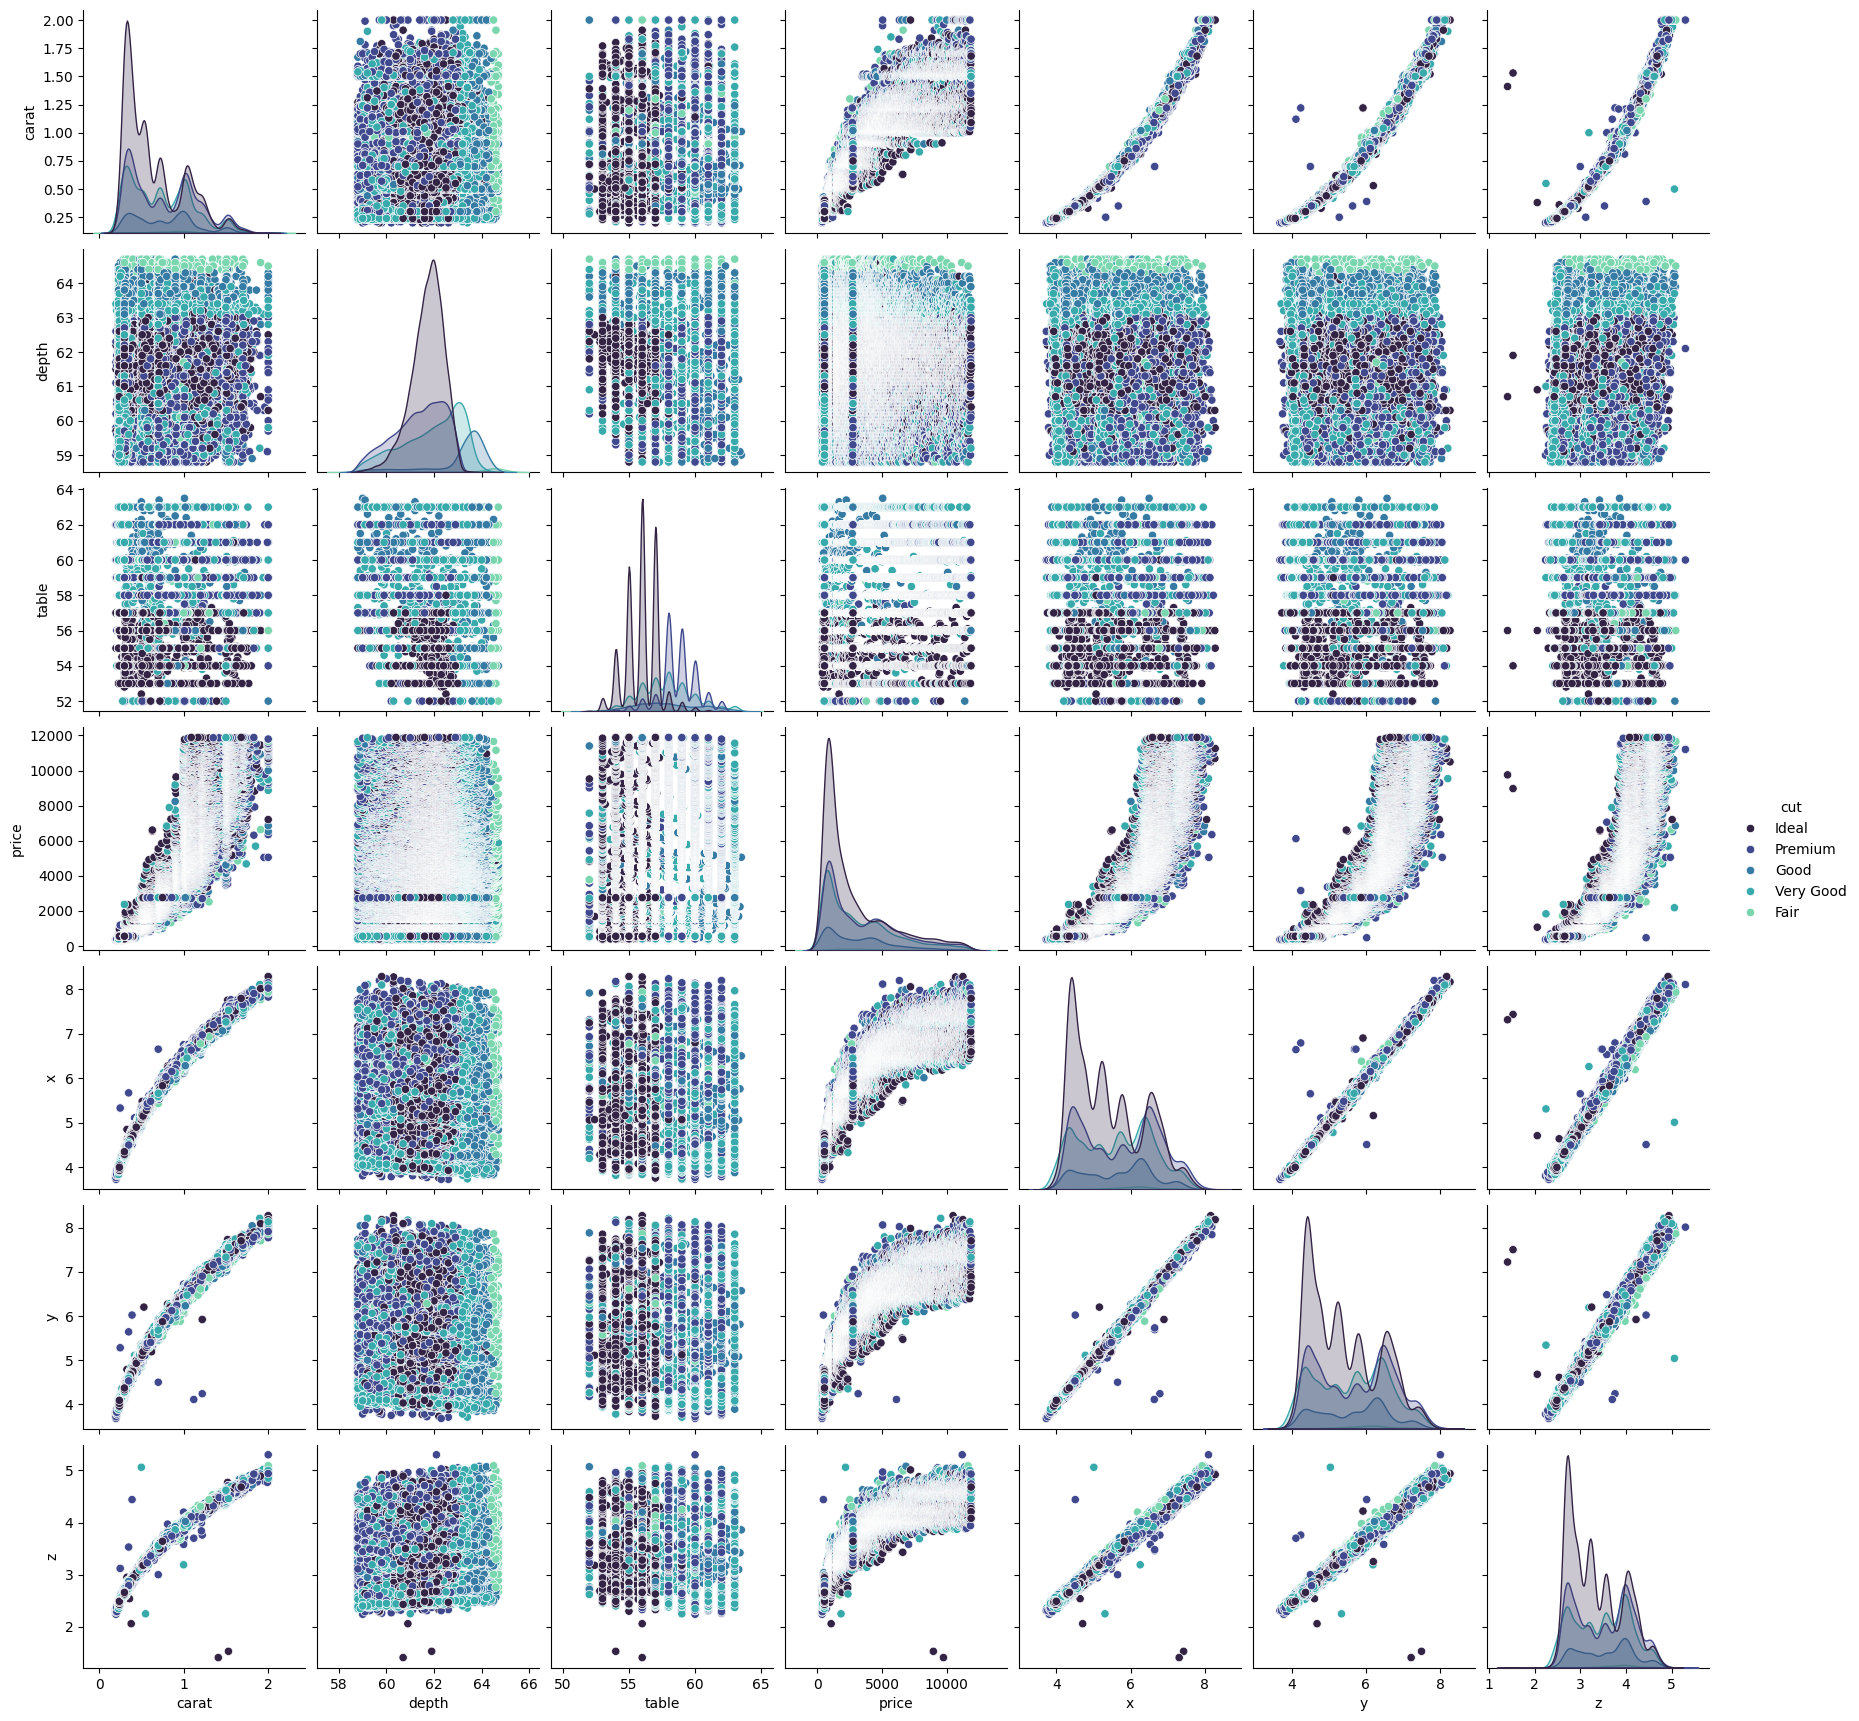

In [26]:
sns.pairplot(df_cleaned, hue='cut', palette='mako')
plt.show()

In [27]:
cat = df_cleaned.select_dtypes(include=['object']).columns
print(cat)

Index(['cut', 'color', 'clarity'], dtype='object')


C:\Users\HP\AppData\Local\Temp\ipykernel_32068\2978708903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='mako')


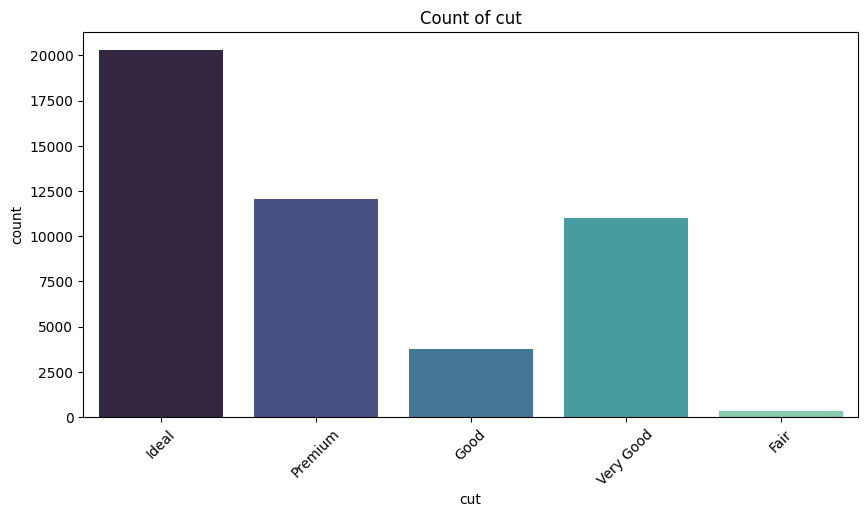

C:\Users\HP\AppData\Local\Temp\ipykernel_32068\2978708903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='mako')


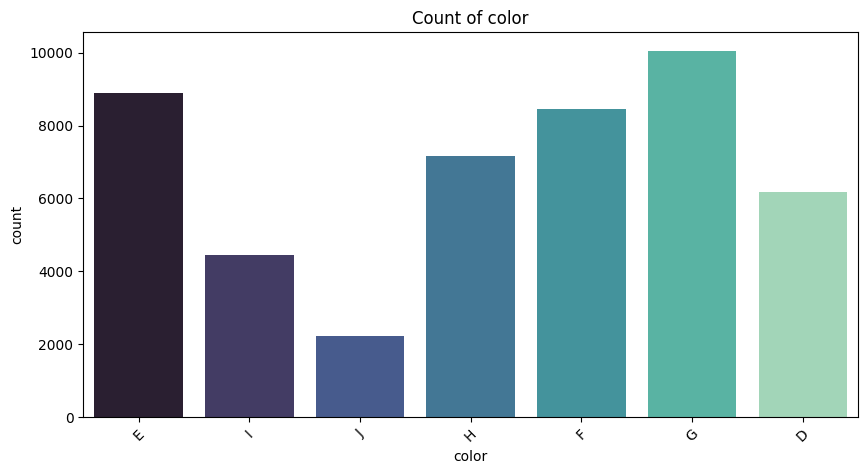

C:\Users\HP\AppData\Local\Temp\ipykernel_32068\2978708903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='mako')


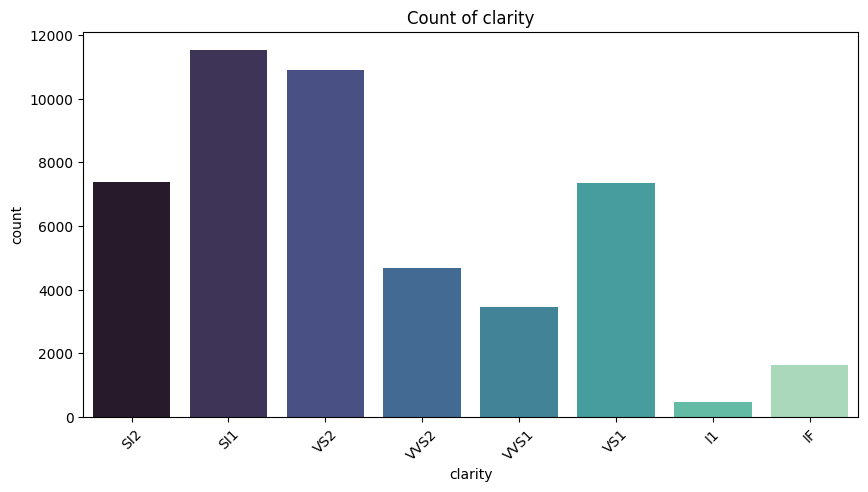

In [28]:
for col in cat:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_cleaned, x=col, palette='mako')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [77]:
# # Violin plots
# for col in cat:
#     plt.figure(figsize=(10, 5))
#     sns.violinplot(data=df_cleaned, x= col, y='price', palette="Blues")
#     plt.title(f'Violin plot of {col} by Price')
#     plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_32068\2004675692.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x= col, y='price', palette="Blues")


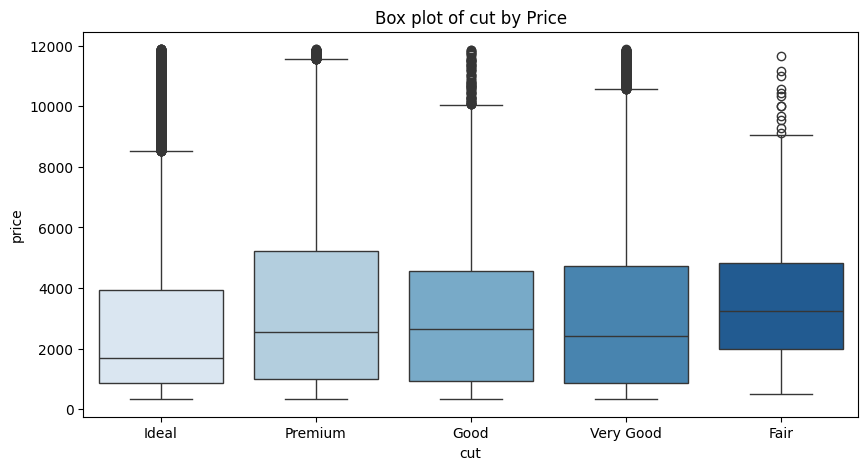

C:\Users\HP\AppData\Local\Temp\ipykernel_32068\2004675692.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x= col, y='price', palette="Blues")


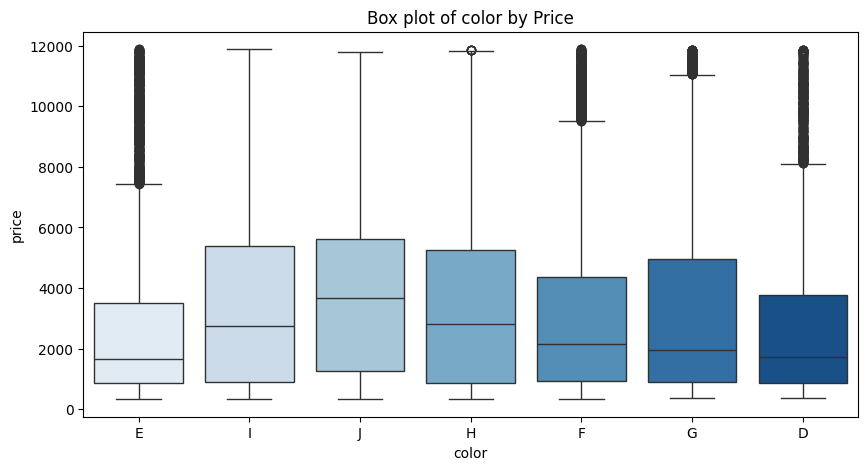

C:\Users\HP\AppData\Local\Temp\ipykernel_32068\2004675692.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x= col, y='price', palette="Blues")


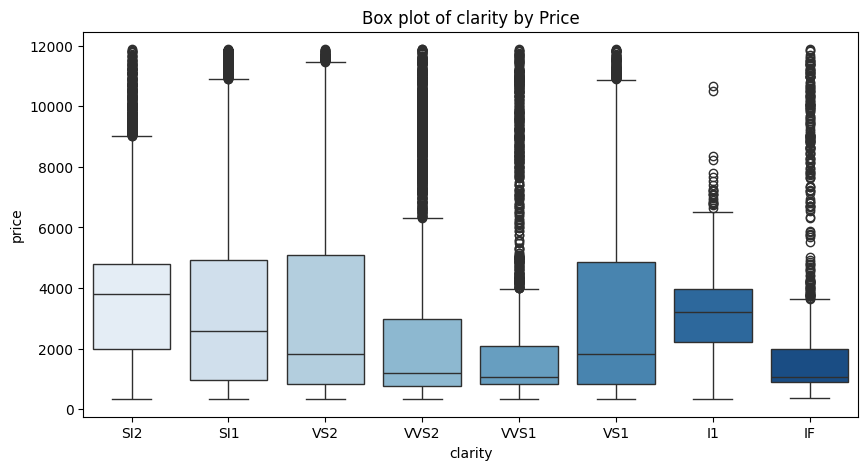

In [30]:
# Box plots
for col in cat:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_cleaned, x= col, y='price', palette="Blues")
    plt.title(f'Box plot of {col} by Price')
    plt.show()


### Exporting Cleaned Data

In [31]:
df_cleaned.to_csv('diamonds_cleaned.csv', index=False)

## Encoding

In [32]:
df_cleaned = pd.read_csv('diamonds_cleaned.csv')

In [33]:
cat = df_cleaned.select_dtypes(include=['object']).columns

In [34]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [35]:
labeled_df = df_cleaned.copy()
for col in cat:
    labeled_df[col] = le.fit_transform(labeled_df[col])
labeled_df.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
3   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75
4   0.24    4      6        7   62.8   57.0    336  3.94  3.96  2.48

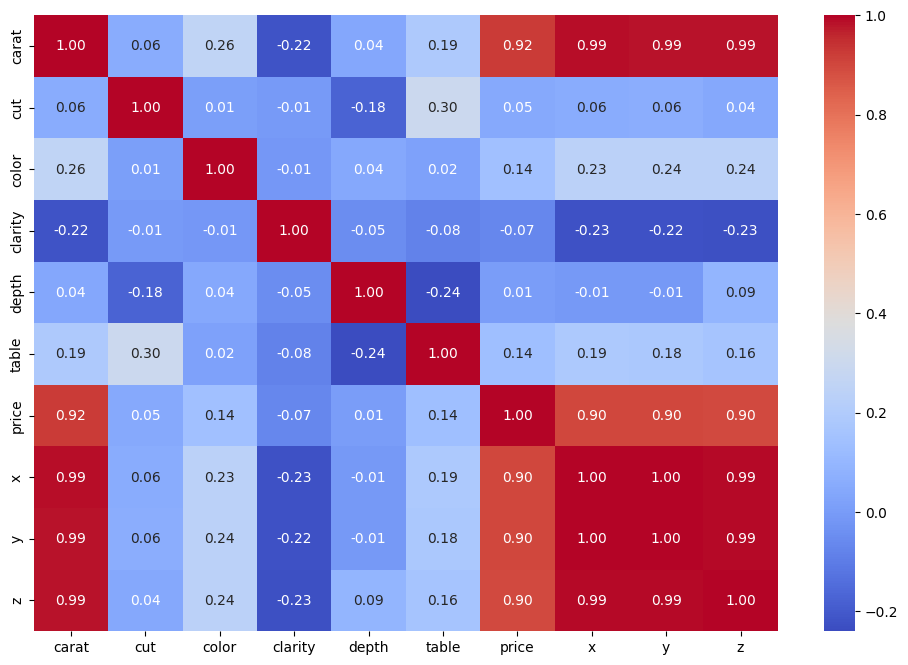

In [36]:
plt.figure(figsize=(12, 8))
corr = labeled_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Data Splitting 

In [37]:
from sklearn.model_selection import train_test_split

X = labeled_df.drop(columns=['price'],axis=1)
y = labeled_df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [38]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [39]:

X_train = scaler.fit_transform(X_train) #calc stander div & mean and apply values
X_test = scaler.transform(X_test) #ensures

## Modelling

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
#importing decision tree 



from sklearn.pipeline import make_pipeline


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score


### Linear Regression

In [41]:

model = LinearRegression() 

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Accuracy Training
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Accuracy Testing
test_accuracy = model.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy:.2f}")


y_pred = model.predict(X_test)
train_pred = model.predict(X_train)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)


Training Accuracy: 0.89
Testing Accuracy: 0.89


In [44]:
print(f"R2 :{r2 :.4f}")
print(f"mae :{mae :.4f}")
print(f"mse :{mse :.4f}")
print(f"rmse :{rmse :.4f}")
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean():.4f}")

R2 :0.8914
mae :610.5716
mse :829496.4105
rmse :910.7669
Cross-validation scores: [0.89286332 0.88849218 0.88771066 0.89109169 0.88591289]
Mean cross-validation score: 0.8892


### Polynomial Regression

In [45]:

degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [46]:
# Accuracy Training
poly_train_accuracy = polyreg.score(X_train, y_train)
print(f"Training Accuracy: {poly_train_accuracy:.2f}")

# Accuracy Testing
poly_test_accuracy = polyreg.score(X_test, y_test)
print(f"Testing Accuracy: {poly_test_accuracy:.2f}")


#Predicting
y_pred_poly = polyreg.predict(X_test)
train_pred_poly = polyreg.predict(X_train)
#Metrics
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
cross_val_scores_poly = cross_val_score(polyreg, X_train, y_train, cv=5)

Training Accuracy: 0.93
Testing Accuracy: 0.93


In [47]:
train_accuracy_poly = polyreg.score(X_train, y_train)
print(f"Training Accuracy (Polynomial Regression): {train_accuracy_poly:.2f}")
print(f"R2 (Polynomial Regression): {r2_poly:.4f}")
print(f"mae (Polynomial Regression): {mae_poly:.4f}")
print(f"mse (Polynomial Regression): {mse_poly:.4f}")
print(f"rmse (Polynomial Regression): {rmse_poly:.4f}")
print(f"Cross-validation scores (Polynomial Regression): {cross_val_scores_poly}")
print(f"Mean cross-validation score (Polynomial Regression): {cross_val_scores_poly.mean():.4f}")

Training Accuracy (Polynomial Regression): 0.93
R2 (Polynomial Regression): 0.9322
mae (Polynomial Regression): 443.3649
mse (Polynomial Regression): 517720.3447
rmse (Polynomial Regression): 719.5279
Cross-validation scores (Polynomial Regression): [0.93080919 0.9330201  0.92831633 0.93380801 0.93079484]
Mean cross-validation score (Polynomial Regression): 0.9313


### Decision Tree

In [48]:
parameters = {
    'max_depth': 20,
    'min_samples_leaf': 10,
    'max_features': 5,
    'random_state': 42
    
    }
    
    
treeModel = DecisionTreeRegressor(**parameters)
treeModel.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=20, max_features=5, min_samples_leaf=10,
                      random_state=42)

In [49]:
tree_train_accuracy = treeModel.score(X_train, y_train)
print(f"Training Accuracy (Decision Tree): {tree_train_accuracy:.2f}")
tree_test_accuracy = treeModel.score(X_test, y_test)
print(f"Testing Accuracy (Decision Tree): {tree_test_accuracy:.2f}")

Training Accuracy (Decision Tree): 0.98
Testing Accuracy (Decision Tree): 0.97


In [50]:
#Predicting with Decision Tree
y_pred_tree = treeModel.predict(X_test)
# Metrics for Decision Tree
r2_tree = r2_score(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
cross_val_scores_tree = cross_val_score(treeModel, X_train, y_train, cv=5)



In [51]:
print(f"R2 (Decision Tree): {r2_tree:.4f}")
print(f"mae (Decision Tree): {mae_tree:.4f}")
print(f"mse (Decision Tree): {mse_tree:.4f}")
print(f"rmse (Decision Tree): {rmse_tree:.4f}")
print(f"Cross-validation scores (Decision Tree): {cross_val_scores_tree}")
print(f"Mean cross-validation score (Decision Tree): {cross_val_scores_tree.mean():.4f}")

R2 (Decision Tree): 0.9715
mae (Decision Tree): 259.3015
mse (Decision Tree): 217591.4610
rmse (Decision Tree): 466.4670
Cross-validation scores (Decision Tree): [0.97070679 0.97435373 0.96975693 0.97050959 0.96997527]
Mean cross-validation score (Decision Tree): 0.9711


## Classification

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import classification_report ,accuracy_score ,recall_score, f1_score , confusion_matrix
from sklearn.svm import SVC

In [64]:
df_cls = df_cleaned.copy()

In [65]:
cut_map = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_map = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_map = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

In [66]:
df_cls['cut'] = df_cls['cut'].map(cut_map)
df_cls['color'] = df_cls['color'].map(color_map)
df_cls['clarity'] = df_cls['clarity'].map(clarity_map)

In [67]:
X = df_cls.drop(columns=['cut'])
y = df_cls['cut']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [69]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42)
    }

In [71]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"--- {name} Results ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=cut_map.keys(), zero_division=0))


Training KNN...
--- KNN Results ---
Accuracy: 0.6633
              precision    recall  f1-score   support

        Fair       0.56      0.20      0.30        99
        Good       0.54      0.54      0.54      1122
   Very Good       0.42      0.35      0.38      3295
     Premium       0.63      0.65      0.64      3625
       Ideal       0.81      0.87      0.84      6084

    accuracy                           0.66     14225
   macro avg       0.59      0.52      0.54     14225
weighted avg       0.65      0.66      0.65     14225


Training Decision Tree...
--- Decision Tree Results ---
Accuracy: 0.7334
              precision    recall  f1-score   support

        Fair       0.75      0.76      0.75        99
        Good       0.78      0.56      0.65      1122
   Very Good       0.67      0.31      0.43      3295
     Premium       0.64      0.85      0.73      3625
       Ideal       0.81      0.92      0.86      6084

    accuracy                           0.73     14225
   

### plotting

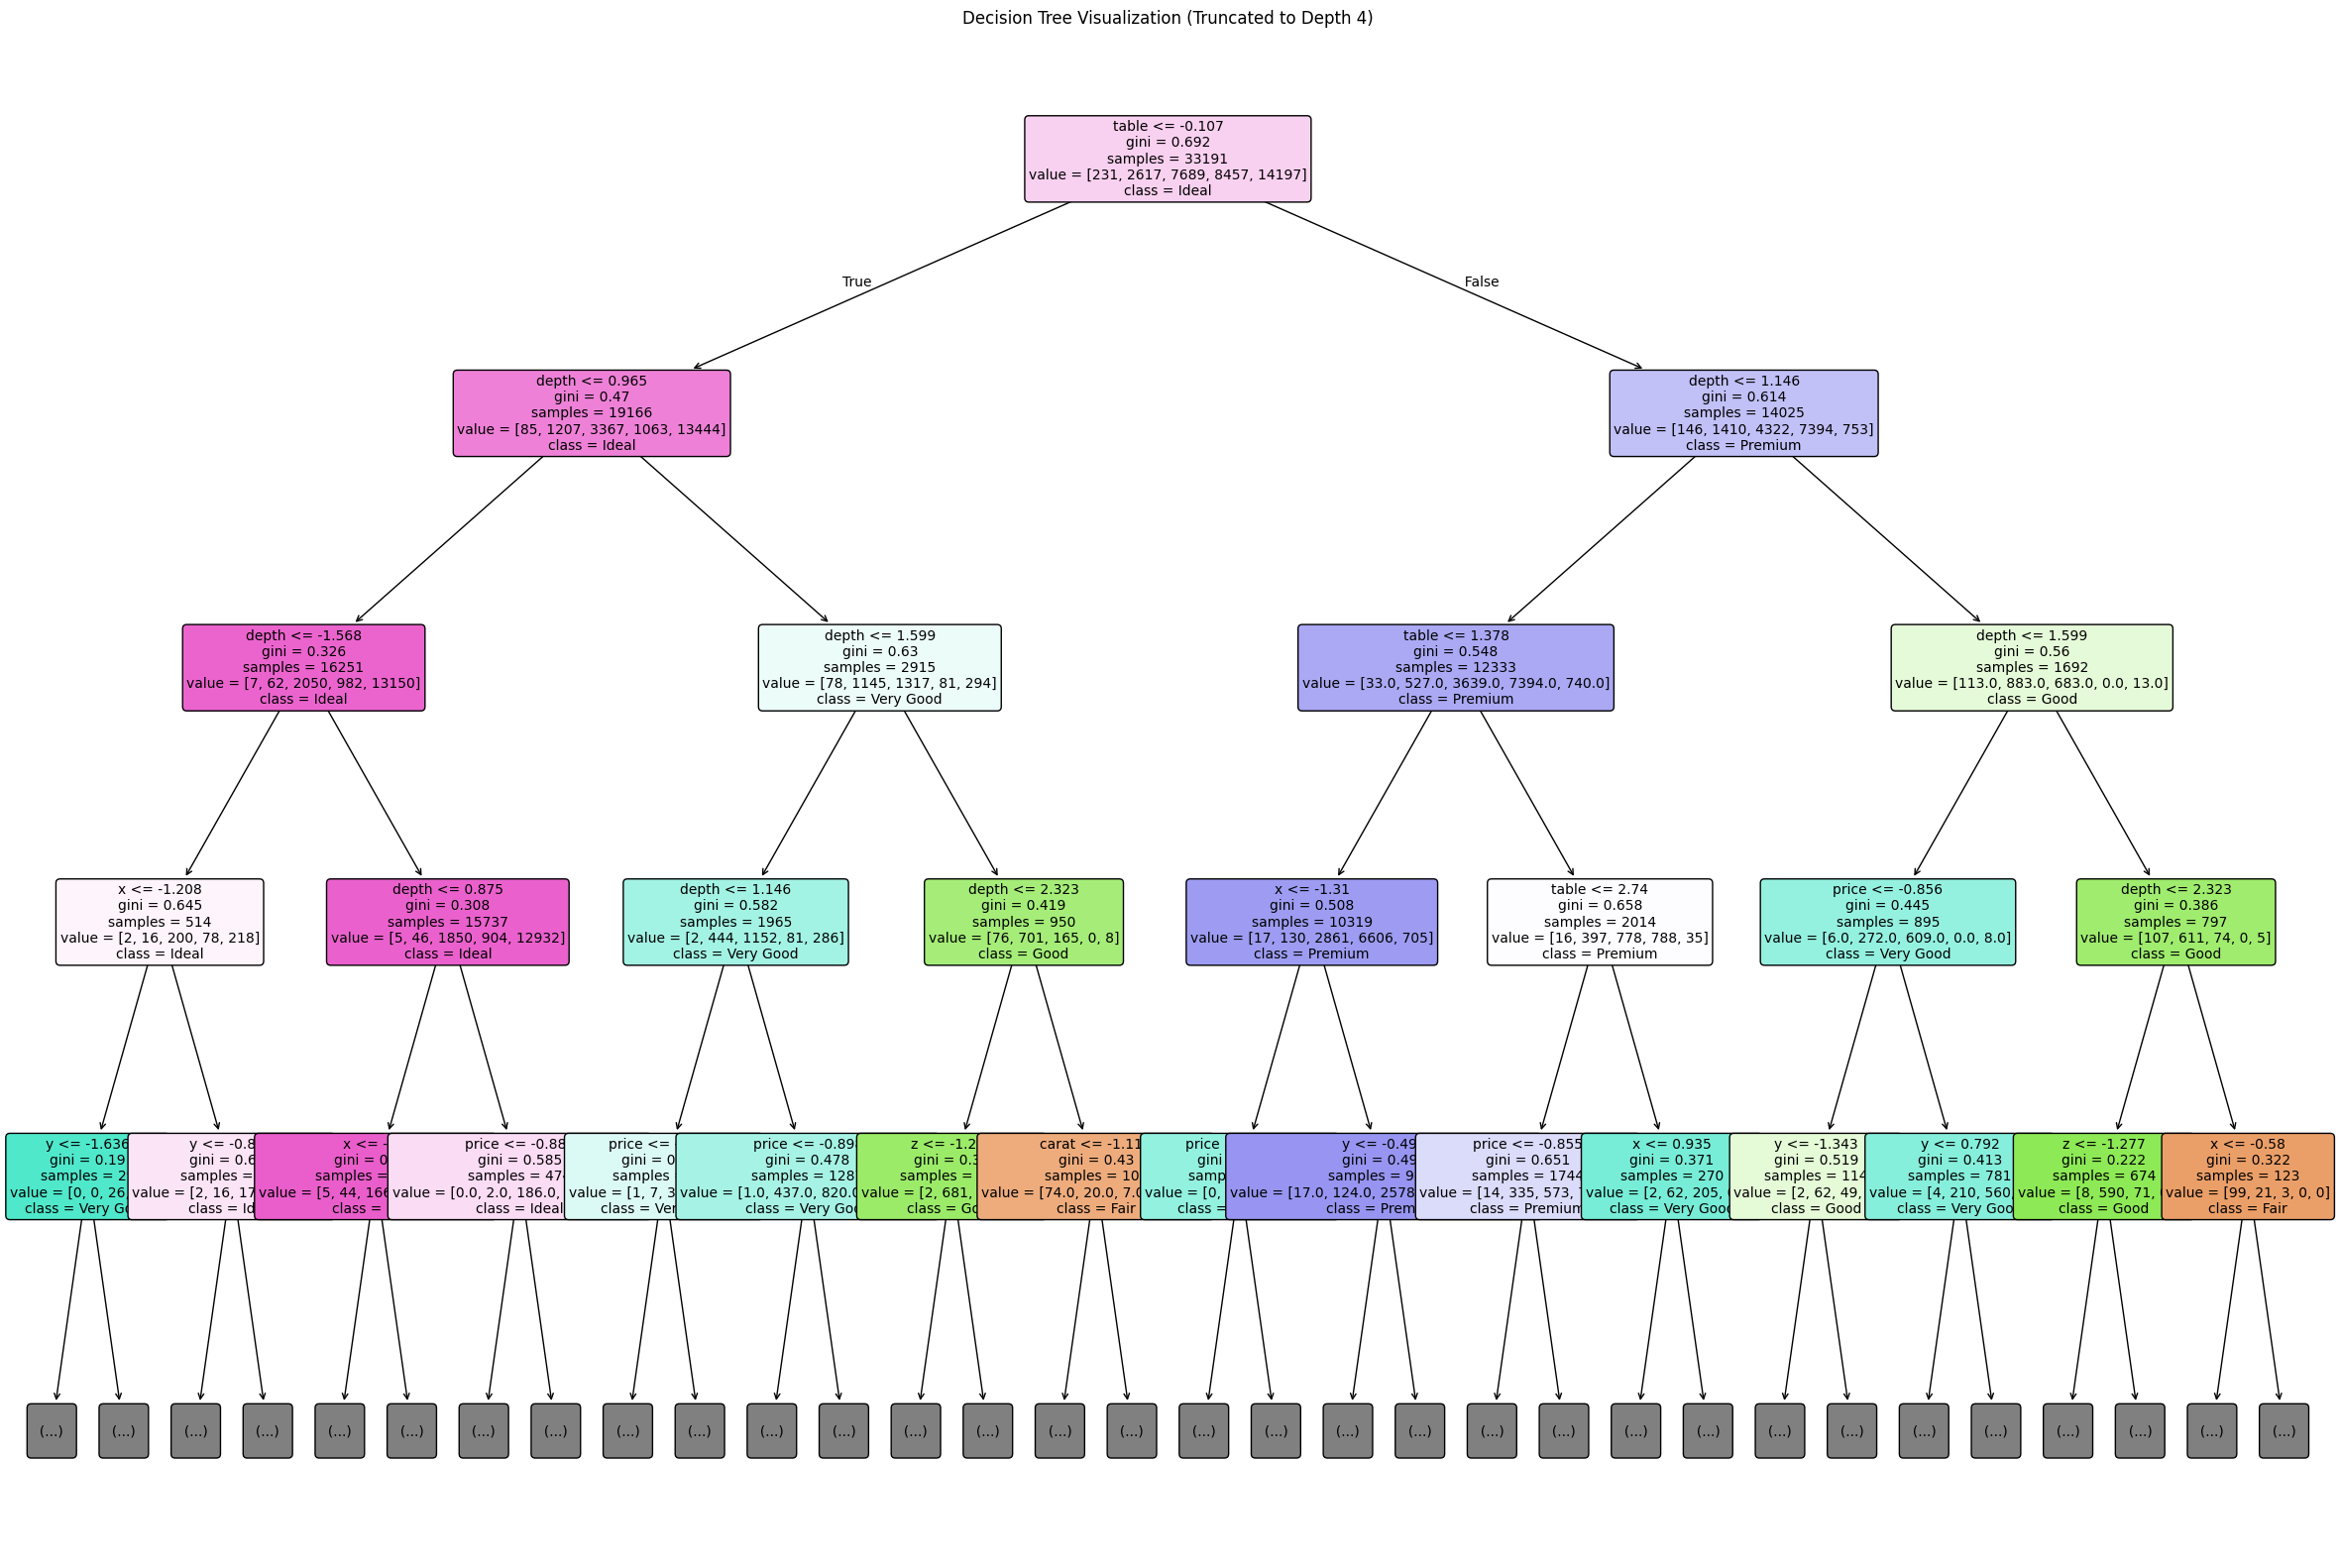

In [72]:
plt.figure(figsize=(30, 20))
plot_tree(models["Decision Tree"], 
          feature_names=X.columns, 
          class_names=list(cut_map.keys()), 
          filled=True, 
          rounded=True, 
          fontsize=10,
          max_depth=4) 
plt.title("Decision Tree Visualization (Truncated to Depth 4)")
plt.show()


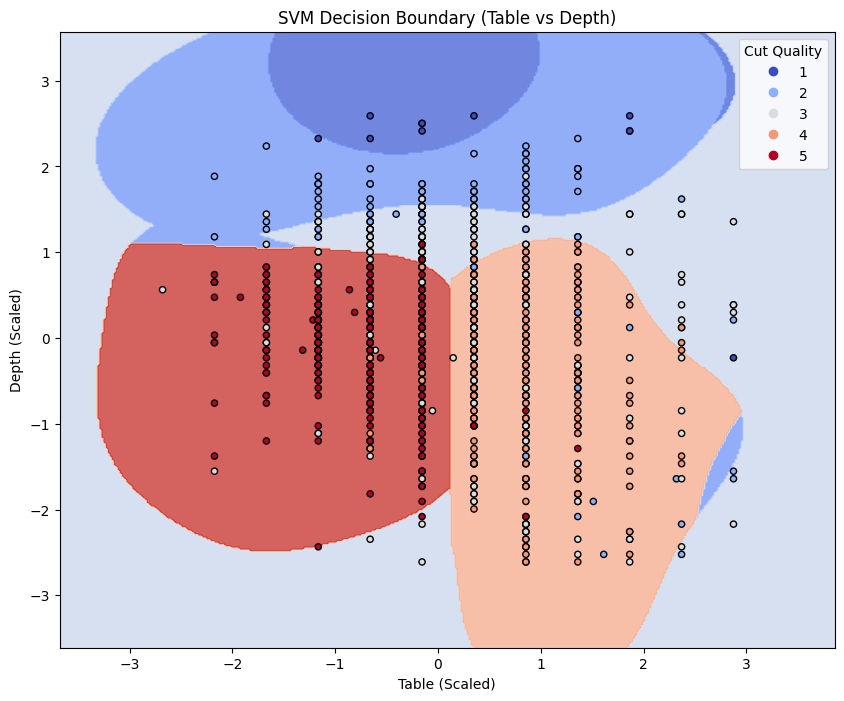

In [73]:
subset = df_cls.sample(n=1000, random_state=42)
X_viz = subset[['table', 'depth']].values
y_viz = subset['cut'].values

scaler_viz = StandardScaler()
X_viz_scaled = scaler_viz.fit_transform(X_viz)


svm_viz = SVC(kernel='rbf', C=1.0, gamma='auto', random_state=42)
svm_viz.fit(X_viz_scaled, y_viz)

h = .02  
x_min, x_max = X_viz_scaled[:, 0].min() - 1, X_viz_scaled[:, 0].max() + 1
y_min, y_max = X_viz_scaled[:, 1].min() - 1, X_viz_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z = svm_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)


scatter = plt.scatter(X_viz_scaled[:, 0], X_viz_scaled[:, 1], c=y_viz, 
                      cmap=plt.cm.coolwarm, edgecolors='k', s=20)

plt.xlabel('Table (Scaled)')
plt.ylabel('Depth (Scaled)')
plt.title('SVM Decision Boundary (Table vs Depth)')
plt.legend(*scatter.legend_elements(), title="Cut Quality")
plt.show()

### UI

In [74]:
import joblib


final_model = models["Decision Tree"] 
final_scaler = scaler 

joblib.dump(final_model, 'diamond_model.pkl')
joblib.dump(final_scaler, 'diamond_scaler.pkl')

print("✅ Success! Model and Scaler have been saved.")

✅ Success! Model and Scaler have been saved.


In [79]:
print("🔄 Saving your custom Decision Tree for the App...")

if 'df_cleaned' in locals():
    df_use = df_cleaned.copy()
else:
    import seaborn as sns
    df_use = sns.load_dataset('diamonds') 

# Mapping
cut_map = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_map = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_map = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

for col, mapper in zip(['cut', 'color', 'clarity'], [cut_map, color_map, clarity_map]):
    if df_use[col].dtype == 'object':
        df_use[col] = df_use[col].map(mapper)

X = df_use.drop(columns=['price'])

y = np.log(df_use['price']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

treeModel = DecisionTreeRegressor(max_depth=20, min_samples_leaf=10, max_features=5, random_state=42)
treeModel.fit(X_train_scaled, y_train)

joblib.dump(treeModel, 'diamond_price_model.pkl')
joblib.dump(scaler, 'diamond_price_scaler.pkl')

print("✅ Success!")


🔄 Saving your custom Decision Tree for the App...
✅ Success!
